## 테마주 분석(ft. 전기자동차)

* 팀장님이 우리 회사와 유사한 테마로 사업을 하고 있는 종목을 수집해서 분석해 달라는 미션을 주셨습니다.
* 코스피에서 해당 테마의 시가총액이 가장 많은 종목을 찾아주세요.
* 해당 테마의 거래량이 가장 많은 종목을 찾아주에세요.
* 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?
* 거래대금이 20위 안에 있는 코스피 종목 중에 "동일업종 PER"가 가장 낮은 종목은 무엇일까요?
* 아래 실습결과에 다른 테마를 적용해 보면 같은 방식으로 여러 테마를 분석해 보실 수 있습니다.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 시각화를 위한 폰트설정
import platform
import matplotlib.pyplot as plt

system_name = platform.system()

if system_name == "Darwin" :
    font_family = "AppleGothic"
elif system_name == "Windows":
    font_family = "Malgun Gothic"
else:
    # Linux
    !apt -qq -y install fonts-nanum > /dev/null
    import matplotlib.font_manager as fm

    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = fm.FontProperties(fname=fontpath, size=9)
    fm._rebuild()
    font_family = "NanumBarunGothic"
    
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")


# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

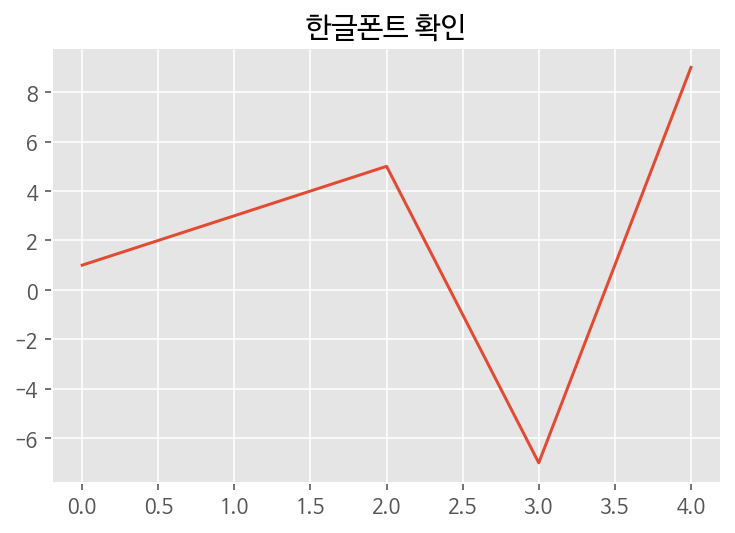

In [ ]:
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트 확인")

In [ ]:
df = pd.read_csv("theme_no_227.csv")
df.shape

(61, 30)

In [ ]:
df.columns

Index(['종목명', '종목명.1', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금',
       '전일거래량', '조회일자', '종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위',
       '외국인한도주식수(A)', '외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
       'PERlEPS(2020.06)', '추정PERlEPS', 'PBRlBPS (2020.06)', '배당수익률l2019.12',
       '동일업종 PER', '동일업종 등락률', '배당수익률', 'PERlEPS(2019.12)',
       'PBRlBPS (2019.12)'],
      dtype='object')

## 데이터 전처리
###  데이터 타입 변경
* 시가총액 데이터 수치형태로 변경하기

In [ ]:
df.head()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률l2019.12,동일업종 PER,동일업종 등락률,배당수익률,PERlEPS(2019.12),PBRlBPS (2019.12)
0,상아프론테크 *,테마 편입 사유,40800.0,2550.0,+6.67%,40800.0,40850.0,392899.0,15475.0,336561.0,2020-10-29,89980,"6,416 억원",코스닥 81위,15724765,500원 l 1주,15724765,378736,2.41%,"4.00매수 l 57,000","55,100 l 7,410",93.58배 l 436원,N/A l N/A,"4.25배 l 9,597원",0.39%,124.90배,+0.48%,NaN,NaN,NaN
1,상신이디피 *,테마 편입 사유,12200.0,500.0,+4.27%,12150.0,12200.0,254132.0,2977.0,176717.0,2020-10-29,91580,"1,589 억원",코스닥 471위,13023002,500원 l 1주,13023002,388125,2.98%,N/A l N/A,"15,800 l 3,540",42.21배 l 289원,N/A l N/A,"2.41배 l 5,065원",0.41%,64.14배,-0.19%,NaN,NaN,NaN
2,에스트래픽 *,테마 편입 사유,4990.0,190.0,+3.96%,4990.0,4995.0,102579.0,501.0,45480.0,2020-10-29,234300,595 억원,코스닥 1044위,11921180,500원 l 1주,11921180,86845,0.73%,N/A l N/A,"7,219 l 2,556",N/A l -867원,N/A l N/A,"2.83배 l 1,765원",NaN,23.08배,-1.38%,NaN,NaN,NaN
3,삼보모터스 *,테마 편입 사유,6450.0,230.0,+3.70%,6440.0,6450.0,380955.0,2415.0,164109.0,2020-10-29,53700,"1,102 억원",코스닥 674위,17084542,500원 l 1주,17084542,0,0.00%,N/A l N/A,"7,960 l 2,220","N/A l -1,519원",N/A l N/A,"0.53배 l 12,115원",NaN,30.09배,-3.12%,NaN,NaN,NaN
4,아모그린텍 *,테마 편입 사유,11200.0,300.0,+2.75%,11200.0,11250.0,60730.0,657.0,33015.0,2020-10-29,125210,"1,848 억원",코스닥 398위,16496790,500원 l 1주,16496790,64205,0.39%,N/A l N/A,"17,450 l 6,500",N/A l -63원,N/A l N/A,"5.15배 l 2,176원",NaN,46.03배,-0.38%,NaN,NaN,NaN


In [ ]:
df["시가총액"].str.split("억원", expand=True)[0]

0          6,416  
1          1,589  
2            595  
3          1,102  
4          1,848  
          ...     
56         1,106  
57    22조  6,230  
58         1,639  
59           526  
60         2,558  
Name: 0, Length: 61, dtype: object

In [ ]:
df["시가총액(억원)"] = df["시가총액"].str.split("억원", expand=True)[0]
df[["시가총액", "시가총액(억원)", '시가총액순위']].head()

,시가총액,시가총액(억원),시가총액순위
0,"6,416 억원","6,416",코스닥 81위
1,"1,589 억원","1,589",코스닥 471위
2,595 억원,595,코스닥 1044위
3,"1,102 억원","1,102",코스닥 674위
4,"1,848 억원","1,848",코스닥 398위


## 파생변수 만들기와 데이터 전처리
* 코스피/코스닥 구분 만들기
* 시가총액 순위 분리하기
* 액면가l매매단위
* 52주최고l최저

In [ ]:
df["코스피/코스닥"] = df['시가총액순위'].str.split(" ", expand=True)[0]
df["시가총액순위(전처리)"] = df['시가총액순위'].str.split(" ", expand=True)[1]
df[["시가총액", "시가총액(억원)", '시가총액순위', '코스피/코스닥', '시가총액순위(전처리)']].head()

,시가총액,시가총액(억원),시가총액순위,코스피/코스닥,시가총액순위(전처리)
0,"6,416 억원","6,416",코스닥 81위,코스닥,81위
1,"1,589 억원","1,589",코스닥 471위,코스닥,471위
2,595 억원,595,코스닥 1044위,코스닥,1044위
3,"1,102 억원","1,102",코스닥 674위,코스닥,674위
4,"1,848 억원","1,848",코스닥 398위,코스닥,398위


### 문자열 자르기 str.split()

In [ ]:
df['액면가l매매단위'].head()

0    500원  l  1주
1    500원  l  1주
2    500원  l  1주
3    500원  l  1주
4    500원  l  1주
Name: 액면가l매매단위, dtype: object

In [ ]:
df["액면가"] = df['액면가l매매단위'].str.split("  l  ", expand=True)[0]
df["매매단위"] = df['액면가l매매단위'].str.split("  l  ", expand=True)[1]
df["액면가"] = df["액면가"].str.replace("원", "")
df["액면가"] = df["액면가"].str.replace(",", "")

In [ ]:
df["시가총액순위(전처리)"] = df["시가총액순위(전처리)"].str.replace("위", "").astype(int)

In [ ]:
df["52주최고"] = df["52주최고l최저"].str.split("  l  ", expand=True)[0]
df["52주최저"] = df["52주최고l최저"].str.split("  l  ", expand=True)[1]

### 문자열 대체 str.replace()

In [ ]:
df["52주최고(int)"] = df["52주최고"].str.replace(",", "").astype(int)
df["52주최저(int)"] = df["52주최저"].str.replace(",", "").astype(int)

df["52주차액"] = df["52주최고(int)"] - df["52주최저(int)"]
df["52주차액비율"] = df["52주최고(int)"] / df["52주최저(int)"]

df["현재-최고가"] = df["현재가"] - df["52주최고(int)"]
df["현재/최고가비율"] =  df["현재가"] / df["52주최고(int)"] 

### 실습 
* "동일업종 PER 컬럼"에서 "배" 문자를 제거하고 수치 변수로 변환해 주세요.
* 전처리 결괏값은 df["동일업종 PER(배)"]라는 컬럼에 담아주세요

In [ ]:
df["동일업종 PER(배)"] = df["동일업종 PER"].str.replace("배", "")
df["동일업종 PER(배)"] = df["동일업종 PER(배)"].astype(float)
df["동일업종 PER(배)"]

0     124.90
1      64.14
2      23.08
3      30.09
4      46.03
       ...  
56     30.09
57     30.09
58     30.09
59     30.09
60     30.09
Name: 동일업종 PER(배), Length: 61, dtype: float64

### 필요한 컬럼만 서브셋으로 가져오기

In [ ]:
df.columns

Index(['종목명', '종목명.1', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금',
       '전일거래량', '조회일자', '종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위',
       '외국인한도주식수(A)', '외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
       'PERlEPS(2020.06)', '추정PERlEPS', 'PBRlBPS (2020.06)', '배당수익률l2019.12',
       '동일업종 PER', '동일업종 등락률', '배당수익률', 'PERlEPS(2019.12)',
       'PBRlBPS (2019.12)', '시가총액(억원)', '코스피/코스닥', '시가총액순위(전처리)', '액면가',
       '매매단위', '52주최고', '52주최저', '52주최고(int)', '52주최저(int)', '52주차액',
       '52주차액비율', '현재-최고가', '현재/최고가비율', '동일업종 PER(배)'],
      dtype='object')

In [ ]:
cols = ['종목명', '현재가','코스피/코스닥', "52주최고(int)", "52주최저(int)", 
    "52주차액", "52주차액비율", "현재-최고가", "현재/최고가비율", "동일업종 PER(배)", 
    "동일업종 등락률", "거래량", "거래대금", "시가총액순위(전처리)"]

In [ ]:
df[cols].sort_values(
    "52주차액비율", ascending=False).head(30)

,종목명,현재가,코스피/코스닥,52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율,동일업종 PER(배),동일업종 등락률,거래량,거래대금,시가총액순위(전처리)
0,상아프론테크 *,40800.0,코스닥,55100,7410,47690,7.435897,-14300.0,0.740472,124.90,+0.48%,392899.0,15475.0,81
24,나라엠앤디 *,10850.0,코스닥,14000,1900,12100,7.368421,-3150.0,0.775000,-22.19,-0.60%,742394.0,7927.0,491
54,인지컨트롤스,10350.0,코스피,15750,2145,13605,7.342657,-5400.0,0.657143,30.09,-3.12%,379167.0,3884.0,566
56,세원 *,4225.0,코스닥,8570,1230,7340,6.967480,-4345.0,0.492999,30.09,-3.12%,594698.0,2513.0,671
60,우수AMS *,8900.0,코스닥,13000,1970,11030,6.598985,-4100.0,0.684615,30.09,-3.12%,18216941.0,189183.0,291
51,KEC,1955.0,코스피,2985,475,2510,6.284211,-1030.0,0.654941,17.67,-1.35%,5919789.0,11492.0,455
48,센트랄모텍,18900.0,코스피,46750,7500,39250,6.233333,-27850.0,0.404278,30.09,-3.12%,27953.0,527.0,552
25,에스모 *,407.0,코스닥,2170,360,1810,6.027778,-1763.0,0.187558,30.09,-3.12%,0.0,0.0,1094
19,동아화성 *,10100.0,코스닥,12500,2425,10075,5.154639,-2400.0,0.808000,30.09,-3.12%,433740.0,4289.0,467
17,영화테크 *,18400.0,코스닥,24500,4900,19600,5.000000,-6100.0,0.751020,30.09,-3.12%,164558.0,2939.0,745


### 서브셋 만들기
* 서브셋 만들기
* 정렬하기

### 코스피에서 해당 테마의 시가총액이 가장 많은 종목을 찾아주세요.

In [ ]:
df[df["코스피/코스닥"] != "코스피"]

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률l2019.12,동일업종 PER,동일업종 등락률,배당수익률,PERlEPS(2019.12),PBRlBPS (2019.12),시가총액(억원),코스피/코스닥,시가총액순위(전처리),액면가,매매단위,52주최고,52주최저,52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율,동일업종 PER(배)
0,상아프론테크 *,테마 편입 사유,40800.0,2550.0,+6.67%,40800.0,40850.0,392899.0,15475.0,336561.0,2020-10-29,89980,"6,416 억원",코스닥 81위,15724765,500원 l 1주,15724765,378736,2.41%,"4.00매수 l 57,000","55,100 l 7,410",93.58배 l 436원,N/A l N/A,"4.25배 l 9,597원",0.39%,124.90배,+0.48%,NaN,NaN,NaN,"6,416",코스닥,81,500,1주,"55,100","7,410",55100,7410,47690,7.435897,-14300.0,0.740472,124.90
1,상신이디피 *,테마 편입 사유,12200.0,500.0,+4.27%,12150.0,12200.0,254132.0,2977.0,176717.0,2020-10-29,91580,"1,589 억원",코스닥 471위,13023002,500원 l 1주,13023002,388125,2.98%,N/A l N/A,"15,800 l 3,540",42.21배 l 289원,N/A l N/A,"2.41배 l 5,065원",0.41%,64.14배,-0.19%,NaN,NaN,NaN,"1,589",코스닥,471,500,1주,"15,800","3,540",15800,3540,12260,4.463277,-3600.0,0.772152,64.14
2,에스트래픽 *,테마 편입 사유,4990.0,190.0,+3.96%,4990.0,4995.0,102579.0,501.0,45480.0,2020-10-29,234300,595 억원,코스닥 1044위,11921180,500원 l 1주,11921180,86845,0.73%,N/A l N/A,"7,219 l 2,556",N/A l -867원,N/A l N/A,"2.83배 l 1,765원",NaN,23.08배,-1.38%,NaN,NaN,NaN,595,코스닥,1044,500,1주,"7,219","2,556",7219,2556,4663,2.824335,-2229.0,0.691231,23.08
3,삼보모터스 *,테마 편입 사유,6450.0,230.0,+3.70%,6440.0,6450.0,380955.0,2415.0,164109.0,2020-10-29,53700,"1,102 억원",코스닥 674위,17084542,500원 l 1주,17084542,0,0.00%,N/A l N/A,"7,960 l 2,220","N/A l -1,519원",N/A l N/A,"0.53배 l 12,115원",NaN,30.09배,-3.12%,NaN,NaN,NaN,"1,102",코스닥,674,500,1주,"7,960","2,220",7960,2220,5740,3.585586,-1510.0,0.810302,30.09
4,아모그린텍 *,테마 편입 사유,11200.0,300.0,+2.75%,11200.0,11250.0,60730.0,657.0,33015.0,2020-10-29,125210,"1,848 억원",코스닥 398위,16496790,500원 l 1주,16496790,64205,0.39%,N/A l N/A,"17,450 l 6,500",N/A l -63원,N/A l N/A,"5.15배 l 2,176원",NaN,46.03배,-0.38%,NaN,NaN,NaN,"1,848",코스닥,398,500,1주,"17,450","6,500",17450,6500,10950,2.684615,-6250.0,0.641834,46.03
5,피앤이솔루션 *,테마 편입 사유,18250.0,400.0,+2.24%,18250.0,18300.0,224132.0,3948.0,191935.0,2020-10-29,131390,"2,704 억원",코스닥 267위,14818910,500원 l 1주,14818910,527714,3.56%,"4.00매수 l 28,000","25,450 l 6,250","14.08배 l 1,296원",N/A l N/A,"2.92배 l 6,254원",NaN,124.90배,+0.48%,NaN,NaN,NaN,"2,704",코스닥,267,500,1주,"25,450","6,250",25450,6250,19200,4.072000,-7200.0,0.717092,124.90
8,이지웰 *,테마 편입 사유,9460.0,120.0,+1.28%,9400.0,9460.0,155040.0,1442.0,141417.0,2020-10-29,90850,"2,246 억원",코스닥 332위,23746361,500원 l 1주,23746361,5704346,24.02%,"4.00매수 l 11,900","10,500 l 2,780",26.20배 l 361원,N/A l N/A,"4.40배 l 2,150원",0.48%,22.48배,-0.26%,NaN,NaN,NaN,"2,246",코스닥,332,500,1주,"10,500","2,780",10500,2780,7720,3.776978,-1040.0,0.900952,22.48
9,엠플러스 *,테마 편입 사유,12500.0,150.0,+1.21%,12500.0,12550.0,259763.0,3159.0,222326.0,2020-10-29,259630,"1,402 억원",코스닥 544위,11212964,500원 l 1주,11212964,177846,1.59%,"4.00매수 l 16,132","20,014 l 4,940",145.35배 l 86원,N/A l N/A,"3.17배 l 3,939원",NaN,124.90배,+0.48%,NaN,NaN,NaN,"1,402",코스닥,544,500,1주,"20,014","4,940",20014,4940,15074,4.051417,-7514.0,0.624563,124.90
10,알파홀딩스 *,테마 편입 사유,4265.0,45.0,+1.07%,4215.0,4265.0,106916.0,451.0,252535.0,2020-10-29,117670,847 억원,코스닥 822위,19866844,500원 l 1주,19866844,173115,0.87%,N/A l N/A,"9,220 l 3,210","N/A l -1,158원",N/A l N/A,"1.15배 l 3,711원",NaN,17.67배,-1.35%,NaN,NaN,NaN,847,코스닥,822,500,1주,"9,220","3,210",9220,3210,6010,2.872274,-4955.0,0.462581,17.67
11,아진산업 *,테마 편입 사유,2945.0,30.0,+1.03%,2940.0,2945.0,1307573.0,3813.0,868208.0,2020-10-29,13310,"1,120 억원",코스닥 662위,38023586,500원 l 1주,38023586,1226699,3.23%,N/A l N/A,"3,820 l 1,325",9.98배 l 295원,N/A l N/A,"0.52배 l 5,678원",NaN,30.09배,-3.12%,NaN,NaN,NaN,"1,120",코스닥,662,500,1주,"3,820","1,325",3820,1325,2495,2.883019,-875.0,0.770942,30.09


In [ ]:
코스피 = df[df["코스피/코스닥"] == "코스피"].sort_values("시가총액순위(전처리)")
코스피[cols].head(20)

,종목명,현재가,코스피/코스닥,52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율,동일업종 PER(배),동일업종 등락률,거래량,거래대금,시가총액순위(전처리)
7,LG화학,651000.0,코스피,785000,230000,555000,3.413043,-134000.0,0.829299,58.64,+0.50%,361503.0,232504.0,5
45,현대차,170000.0,코스피,191500,65000,126500,2.946154,-21500.0,0.887728,24.51,-1.85%,1471138.0,249332.0,7
21,삼성SDI,431500.0,코스피,509000,180000,329000,2.827778,-77500.0,0.847741,124.90,+0.48%,260758.0,110887.0,10
57,현대모비스,238000.0,코스피,268500,126000,142500,2.130952,-30500.0,0.886406,30.09,-3.12%,690707.0,167282.0,12
41,기아차,53000.0,코스피,53900,21500,32400,2.506977,-900.0,0.983302,24.51,-1.85%,3210725.0,169002.0,13
42,SK이노베이션,129500.0,코스피,197500,55100,142400,3.584392,-68000.0,0.655696,-8.65,-1.73%,434457.0,55516.0,27
52,한온시스템,11750.0,코스피,14150,8100,6050,1.746914,-2400.0,0.830389,30.09,-3.12%,599859.0,7059.0,40
18,SKC,74300.0,코스피,104500,27700,76800,3.772563,-30200.0,0.711005,58.64,+0.50%,208600.0,15263.0,89
6,만도,36900.0,코스피,39550,16200,23350,2.441358,-2650.0,0.932996,30.09,-3.12%,943581.0,34375.0,123
55,LS ELECTRIC,50800.0,코스피,79200,25550,53650,3.099804,-28400.0,0.641414,-70.02,-1.47%,168335.0,8531.0,135


### 해당 테마의 거래량이 가장 많은 종목을 찾아주세요.

In [ ]:
코스피.sort_values(by="거래량", ascending=False)

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률l2019.12,동일업종 PER,동일업종 등락률,배당수익률,PERlEPS(2019.12),PBRlBPS (2019.12),시가총액(억원),코스피/코스닥,시가총액순위(전처리),액면가,매매단위,52주최고,52주최저,52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율,동일업종 PER(배)
51,KEC,테마 편입 사유,1955.0,55.0,-2.74%,1955.0,1960.0,5919789.0,11492.0,9281798.0,2020-10-29,92220,"2,282 억원",코스피 455위,116706940,500원 l 1주,116706940,4611808,3.95%,N/A l N/A,"2,985 l 475",N/A l -178원,N/A l N/A,"1.10배 l 1,785원",NaN,17.67배,-1.35%,NaN,NaN,NaN,"2,282",코스피,455,500,1주,"2,985",475,2985,475,2510,6.284211,-1030.0,0.654941,17.67
41,기아차,테마 편입 사유,53000.0,800.0,-1.49%,53000.0,53100.0,3210725.0,169002.0,3567700.0,2020-10-29,270,"21조 4,843 억원",코스피 13위,405363347,"5,000원 l 1주",405363347,156413451,38.59%,"4.00매수 l 66,421","53,900 l 21,500","20.18배 l 2,626원","15.00배 l 3,566원","0.74배 l 72,087원",2.17%,24.51배,-1.85%,NaN,NaN,NaN,"21조 4,843",코스피,13,5000,1주,"53,900","21,500",53900,21500,32400,2.506977,-900.0,0.983302,24.51
45,현대차,테마 편입 사유,170000.0,3500.0,-2.02%,169500.0,170000.0,1471138.0,249332.0,1419988.0,2020-10-29,5380,"36조 3,236 억원",코스피 7위,213668187,"5,000원 l 1주",213668187,66601241,31.17%,"4.00매수 l 230,789","191,500 l 65,000","24.50배 l 6,940원","25.00배 l 6,743원","0.64배 l 267,635원",2.35%,24.51배,-1.85%,NaN,NaN,NaN,"36조 3,236",코스피,7,5000,1주,"191,500","65,000",191500,65000,126500,2.946154,-21500.0,0.887728,24.51
6,만도,테마 편입 사유,36900.0,550.0,+1.51%,36850.0,36900.0,943581.0,34375.0,487597.0,2020-10-29,204320,"1조 7,327 억원",코스피 123위,46957120,"1,000원 l 1주",46957120,9990948,21.28%,"3.92매수 l 42,000","39,550 l 16,200",N/A l -882원,-74.00배 l -496원,"1.23배 l 30,019원",1.49%,30.09배,-3.12%,NaN,NaN,NaN,"1조 7,327",코스피,123,1000,1주,"39,550","16,200",39550,16200,23350,2.441358,-2650.0,0.932996,30.09
57,현대모비스,테마 편입 사유,238000.0,14500.0,-5.74%,238000.0,238500.0,690707.0,167282.0,487858.0,2020-10-29,12330,"22조 6,230 억원",코스피 12위,95054694,"5,000원 l 1주",95054694,41036609,43.17%,"3.88매수 l 291,176","268,500 l 126,000","12.97배 l 18,356원","13.00배 l 18,446원","0.68배 l 350,826원",1.68%,30.09배,-3.12%,NaN,NaN,NaN,"22조 6,230",코스피,12,5000,1주,"268,500","126,000",268500,126000,142500,2.130952,-30500.0,0.886406,30.09
52,한온시스템,테마 편입 사유,11750.0,350.0,-2.89%,11750.0,11800.0,599859.0,7059.0,574576.0,2020-10-29,18880,"6조 2,722 억원",코스피 40위,533800000,100원 l 1주,533800000,110318228,20.67%,"3.71매수 l 14,000","14,150 l 8,100",37.66배 l 312원,41.00배 l 290원,"2.94배 l 3,999원",2.72%,30.09배,-3.12%,NaN,NaN,NaN,"6조 2,722",코스피,40,100,1주,"14,150","8,100",14150,8100,6050,1.746914,-2400.0,0.830389,30.09
42,SK이노베이션,테마 편입 사유,129500.0,2000.0,-1.52%,129000.0,129500.0,434457.0,55516.0,243257.0,2020-10-29,96770,"11조 9,743 억원",코스피 27위,92465564,"5,000원 l 1주",92465564,21866940,23.65%,"3.79매수 l 176,158","197,500 l 55,100","N/A l -24,418원","-7.00배 l -19,645원","0.72배 l 180,581원",2.32%,-8.65배,-1.73%,NaN,NaN,NaN,"11조 9,743",코스피,27,5000,1주,"197,500","55,100",197500,55100,142400,3.584392,-68000.0,0.655696,-8.65
54,인지컨트롤스,테마 편입 사유,10350.0,350.0,-3.27%,10350.0,10400.0,379167.0,3884.0,533304.0,2020-10-29,23800,"1,569 억원",코스피 566위,15160128,500원 l 1주,15160128,844401,5.57%,N/A l N/A,"15,750 l 2,145",N/A l -545원,N/A l N/A,"0.84배 l 12,256원",0.97%,30.09배,-3.12%,NaN,NaN,NaN,"1,569",코스피,566,500,1주,"15,750","2,145",15750,2145,13605,7.342657,-5400.0,0.657143,30.09
7,LG화학,테마 편입 사유,651000.0,9000.0,+1.40%,651000.0,652000.0,361503.0,232504.0,368105.0,2020-10-29,51910,"45조 9,556 억원",코스피 5위,70592343,"5,000원 l 1주",70592343,27426819,38.85%,"4.00매수 l 924,381","785,000 l 230,000","112.22배 l 5,801원","36.00배 l 18,209원","2.87배 l 226,690원",0.31%,58.64배,+0.50%,NaN,NaN,NaN,"45조 9,556",코스피,5,5000,1주,"785,000","230,000",785000,230000,555000,3.413043,-134000.0,0.829299,58.64
21,삼성SDI,테마 편입 사유,431500.0,1500.0,+0.35%,431500.0,432000.0,260758.0,110887.0,257709.0,2020-10-29,6400,"29조 6,719 억원",코스피 10위,68764530,"5,000원 l 1주",68764530,29000910,42.17%,"4.00매수 l 561,579","509,000 l 180,000","158.52

### 코스피 해당 테마 종목 중 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?

In [ ]:
코스피[cols].sort_values("현재-최고가", ascending=True).head(20)

,종목명,현재가,코스피/코스닥,52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율,동일업종 PER(배),동일업종 등락률,거래량,거래대금,시가총액순위(전처리)
7,LG화학,651000.0,코스피,785000,230000,555000,3.413043,-134000.0,0.829299,58.64,+0.50%,361503.0,232504.0,5
21,삼성SDI,431500.0,코스피,509000,180000,329000,2.827778,-77500.0,0.847741,124.90,+0.48%,260758.0,110887.0,10
42,SK이노베이션,129500.0,코스피,197500,55100,142400,3.584392,-68000.0,0.655696,-8.65,-1.73%,434457.0,55516.0,27
57,현대모비스,238000.0,코스피,268500,126000,142500,2.130952,-30500.0,0.886406,30.09,-3.12%,690707.0,167282.0,12
18,SKC,74300.0,코스피,104500,27700,76800,3.772563,-30200.0,0.711005,58.64,+0.50%,208600.0,15263.0,89
55,LS ELECTRIC,50800.0,코스피,79200,25550,53650,3.099804,-28400.0,0.641414,-70.02,-1.47%,168335.0,8531.0,135
48,센트랄모텍,18900.0,코스피,46750,7500,39250,6.233333,-27850.0,0.404278,30.09,-3.12%,27953.0,527.0,552
45,현대차,170000.0,코스피,191500,65000,126500,2.946154,-21500.0,0.887728,24.51,-1.85%,1471138.0,249332.0,7
32,삼화콘덴서,51400.0,코스피,69900,33000,36900,2.118182,-18500.0,0.735336,124.90,+0.48%,43032.0,2191.0,278
35,두산솔루스,31700.0,코스피,50200,13650,36550,3.677656,-18500.0,0.631474,46.03,-0.38%,139743.0,4356.0,185


### 코스피 해당 테마에서 거래대금이 20위 안에 있는 코스피 종목 중에 "동일업종 PER"가 가장 낮은 종목은 무엇일까요?

In [ ]:
cols

['종목명',
 '현재가',
 '코스피/코스닥',
 '52주최고(int)',
 '52주최저(int)',
 '52주차액',
 '52주차액비율',
 '현재-최고가',
 '현재/최고가비율',
 '동일업종 PER(배)',
 '동일업종 등락률',
 '거래량',
 '거래대금',
 '시가총액순위(전처리)']

In [ ]:
코스피거래대금 = 코스피[cols].sort_values(by="거래대금", ascending=False).head(20)
코스피거래대금.sort_values(by="동일업종 PER(배)")

,종목명,현재가,코스피/코스닥,52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율,동일업종 PER(배),동일업종 등락률,거래량,거래대금,시가총액순위(전처리)
55,LS ELECTRIC,50800.0,코스피,79200,25550,53650,3.099804,-28400.0,0.641414,-70.02,-1.47%,168335.0,8531.0,135
42,SK이노베이션,129500.0,코스피,197500,55100,142400,3.584392,-68000.0,0.655696,-8.65,-1.73%,434457.0,55516.0,27
51,KEC,1955.0,코스피,2985,475,2510,6.284211,-1030.0,0.654941,17.67,-1.35%,5919789.0,11492.0,455
45,현대차,170000.0,코스피,191500,65000,126500,2.946154,-21500.0,0.887728,24.51,-1.85%,1471138.0,249332.0,7
41,기아차,53000.0,코스피,53900,21500,32400,2.506977,-900.0,0.983302,24.51,-1.85%,3210725.0,169002.0,13
6,만도,36900.0,코스피,39550,16200,23350,2.441358,-2650.0,0.932996,30.09,-3.12%,943581.0,34375.0,123
48,센트랄모텍,18900.0,코스피,46750,7500,39250,6.233333,-27850.0,0.404278,30.09,-3.12%,27953.0,527.0,552
52,한온시스템,11750.0,코스피,14150,8100,6050,1.746914,-2400.0,0.830389,30.09,-3.12%,599859.0,7059.0,40
54,인지컨트롤스,10350.0,코스피,15750,2145,13605,7.342657,-5400.0,0.657143,30.09,-3.12%,379167.0,3884.0,566
30,한국단자,46600.0,코스피,53400,19650,33750,2.717557,-6800.0,0.872659,30.09,-3.12%,37449.0,1718.0,296


In [ ]:
코스피거래대금 = 코스피[cols].sort_values("거래대금", ascending=False).head(20)
코스피거래대금

,종목명,현재가,코스피/코스닥,52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율,동일업종 PER(배),동일업종 등락률,거래량,거래대금,시가총액순위(전처리)
45,현대차,170000.0,코스피,191500,65000,126500,2.946154,-21500.0,0.887728,24.51,-1.85%,1471138.0,249332.0,7
7,LG화학,651000.0,코스피,785000,230000,555000,3.413043,-134000.0,0.829299,58.64,+0.50%,361503.0,232504.0,5
41,기아차,53000.0,코스피,53900,21500,32400,2.506977,-900.0,0.983302,24.51,-1.85%,3210725.0,169002.0,13
57,현대모비스,238000.0,코스피,268500,126000,142500,2.130952,-30500.0,0.886406,30.09,-3.12%,690707.0,167282.0,12
21,삼성SDI,431500.0,코스피,509000,180000,329000,2.827778,-77500.0,0.847741,124.90,+0.48%,260758.0,110887.0,10
42,SK이노베이션,129500.0,코스피,197500,55100,142400,3.584392,-68000.0,0.655696,-8.65,-1.73%,434457.0,55516.0,27
6,만도,36900.0,코스피,39550,16200,23350,2.441358,-2650.0,0.932996,30.09,-3.12%,943581.0,34375.0,123
18,SKC,74300.0,코스피,104500,27700,76800,3.772563,-30200.0,0.711005,58.64,+0.50%,208600.0,15263.0,89
51,KEC,1955.0,코스피,2985,475,2510,6.284211,-1030.0,0.654941,17.67,-1.35%,5919789.0,11492.0,455
55,LS ELECTRIC,50800.0,코스피,79200,25550,53650,3.099804,-28400.0,0.641414,-70.02,-1.47%,168335.0,8531.0,135


In [ ]:
# 동일업종 PER
코스피거래대금.sort_values("동일업종 PER(배)")

,종목명,현재가,코스피/코스닥,52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율,동일업종 PER(배),동일업종 등락률,거래량,거래대금,시가총액순위(전처리)
55,LS ELECTRIC,50800.0,코스피,79200,25550,53650,3.099804,-28400.0,0.641414,-70.02,-1.47%,168335.0,8531.0,135
42,SK이노베이션,129500.0,코스피,197500,55100,142400,3.584392,-68000.0,0.655696,-8.65,-1.73%,434457.0,55516.0,27
51,KEC,1955.0,코스피,2985,475,2510,6.284211,-1030.0,0.654941,17.67,-1.35%,5919789.0,11492.0,455
45,현대차,170000.0,코스피,191500,65000,126500,2.946154,-21500.0,0.887728,24.51,-1.85%,1471138.0,249332.0,7
41,기아차,53000.0,코스피,53900,21500,32400,2.506977,-900.0,0.983302,24.51,-1.85%,3210725.0,169002.0,13
6,만도,36900.0,코스피,39550,16200,23350,2.441358,-2650.0,0.932996,30.09,-3.12%,943581.0,34375.0,123
48,센트랄모텍,18900.0,코스피,46750,7500,39250,6.233333,-27850.0,0.404278,30.09,-3.12%,27953.0,527.0,552
52,한온시스템,11750.0,코스피,14150,8100,6050,1.746914,-2400.0,0.830389,30.09,-3.12%,599859.0,7059.0,40
54,인지컨트롤스,10350.0,코스피,15750,2145,13605,7.342657,-5400.0,0.657143,30.09,-3.12%,379167.0,3884.0,566
30,한국단자,46600.0,코스피,53400,19650,33750,2.717557,-6800.0,0.872659,30.09,-3.12%,37449.0,1718.0,296



## 상관분석

상관 분석(相關 分析, Correlation analysis) 또는 '상관관계' 또는 '상관'은 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법이다. 두 변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다. 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수로 ρ를 사용하며 표본 상관 계수로 r 을 사용한다.

상관관계의 정도를 파악하는 상관 계수(相關係數, Correlation coefficient)는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다. 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다.

* 출처 : https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

### 피어슨 상관계수

* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 
* 결정계수(coefficient of determination)는 r^2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.

```
일반적으로
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

* https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D#%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98



### 상관계수 구하기

In [ ]:
코스피.corr()

,현재가,전일비,매수호가,매도호가,거래량,거래대금,전일거래량,종목코드,상장주식수,외국인한도주식수(A),외국인보유주식수(B),배당수익률,시가총액순위(전처리),52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율,동일업종 PER(배)
현재가,1.000000,0.656293,1.000000,1.000000,-0.061056,0.740243,-0.090997,-0.124528,0.027604,0.027604,0.154133,NaN,-0.503226,0.997735,0.988224,0.990869,-0.131813,-0.920429,0.289724,0.179975
전일비,0.656293,1.000000,0.656286,0.656484,-0.006408,0.689192,-0.059173,-0.123427,0.062842,0.062842,0.187057,NaN,-0.428442,0.642599,0.715438,0.601005,-0.185346,-0.533135,0.288746,-0.098682
매수호가,1.000000,0.656286,1.000000,1.000000,-0.061101,0.739961,-0.090987,-0.124509,0.027486,0.027486,0.154014,NaN,-0.502984,0.997715,0.988227,0.990840,-0.131786,-0.920318,0.289695,0.180220
매도호가,1.000000,0.656484,1.000000,1.000000,-0.061087,0.740155,-0.091007,-0.124523,0.027572,0.027572,0.154109,NaN,-0.503146,0.997725,0.988239,0.990848,-0.131826,-0.920374,0.289734,0.179991
거래량,-0.061056,-0.006408,-0.061101,-0.061087,1.000000,0.240962,0.982817,-0.006021,0.404801,0.404801,0.372113,NaN,-0.165257,-0.076289,-0.068529,-0.079075,0.297103,0.145516,0.126907,-0.213554
거래대금,0.740243,0.689192,0.739961,0.740155,0.240962,1.000000,0.129684,-0.192226,0.370904,0.370904,0.563876,NaN,-0.567106,0.720245,0.742817,0.701431,-0.191387,-0.574874,0.493768,-0.031624
전일거래량,-0.090997,-0.059173,-0.090987,-0.091007,0.982817,0.129684,1.000000,-0.005225,0.306978,0.306978,0.242234,NaN,-0.068824,-0.103223,-0.103314,-0.102007,0.377593,0.156002,0.018473,-0.181106
종목코드,-0.124528,-0.123427,-0.124509,-0.124523,-0.006021,-0.192226,-0.005225,1.000000,-0.181358,-0.181358,-0.230437,NaN,-0.020404,-0.099240,-0.144065,-0.077010,0.317374,-0.030692,-0.483219,-0.158852
상장주식수,0.027604,0.062842,0.027486,0.027572,0.404801,0.370904,0.306978,-0.181358,1.000000,1.000000,0.926362,NaN,-0.431636,0.011416,0.031883,0.001652,-0.267554,0.068293,0.386468,-0.181426
외국인한도주식수(A),0.027604,0.062842,0.027486,0.027572,0.404801,0.370904,0.306978,-0.181358,1.000000,1.000000,0.926362,NaN,-0.431636,0.011416,0.031883,0.001652,-0.267554,0.068293,0.386468,-0.181426


In [ ]:
kospi_corr = 코스피.corr().dropna(how="all", axis=0).dropna(how="all", axis=1)
kospi_corr

,현재가,전일비,매수호가,매도호가,거래량,거래대금,전일거래량,종목코드,상장주식수,외국인한도주식수(A),외국인보유주식수(B),시가총액순위(전처리),52주최고(int),52주최저(int),52주차액,52주차액비율,현재-최고가,현재/최고가비율,동일업종 PER(배)
현재가,1.000000,0.656293,1.000000,1.000000,-0.061056,0.740243,-0.090997,-0.124528,0.027604,0.027604,0.154133,-0.503226,0.997735,0.988224,0.990869,-0.131813,-0.920429,0.289724,0.179975
전일비,0.656293,1.000000,0.656286,0.656484,-0.006408,0.689192,-0.059173,-0.123427,0.062842,0.062842,0.187057,-0.428442,0.642599,0.715438,0.601005,-0.185346,-0.533135,0.288746,-0.098682
매수호가,1.000000,0.656286,1.000000,1.000000,-0.061101,0.739961,-0.090987,-0.124509,0.027486,0.027486,0.154014,-0.502984,0.997715,0.988227,0.990840,-0.131786,-0.920318,0.289695,0.180220
매도호가,1.000000,0.656484,1.000000,1.000000,-0.061087,0.740155,-0.091007,-0.124523,0.027572,0.027572,0.154109,-0.503146,0.997725,0.988239,0.990848,-0.131826,-0.920374,0.289734,0.179991
거래량,-0.061056,-0.006408,-0.061101,-0.061087,1.000000,0.240962,0.982817,-0.006021,0.404801,0.404801,0.372113,-0.165257,-0.076289,-0.068529,-0.079075,0.297103,0.145516,0.126907,-0.213554
거래대금,0.740243,0.689192,0.739961,0.740155,0.240962,1.000000,0.129684,-0.192226,0.370904,0.370904,0.563876,-0.567106,0.720245,0.742817,0.701431,-0.191387,-0.574874,0.493768,-0.031624
전일거래량,-0.090997,-0.059173,-0.090987,-0.091007,0.982817,0.129684,1.000000,-0.005225,0.306978,0.306978,0.242234,-0.068824,-0.103223,-0.103314,-0.102007,0.377593,0.156002,0.018473,-0.181106
종목코드,-0.124528,-0.123427,-0.124509,-0.124523,-0.006021,-0.192226,-0.005225,1.000000,-0.181358,-0.181358,-0.230437,-0.020404,-0.099240,-0.144065,-0.077010,0.317374,-0.030692,-0.483219,-0.158852
상장주식수,0.027604,0.062842,0.027486,0.027572,0.404801,0.370904,0.306978,-0.181358,1.000000,1.000000,0.926362,-0.431636,0.011416,0.031883,0.001652,-0.267554,0.068293,0.386468,-0.181426
외국인한도주식수(A),0.027604,0.062842,0.027486,0.027572,0.404801,0.370904,0.306978,-0.181358,1.000000,1.000000,0.926362,-0.431636,0.011416,0.031883,0.001652,-0.267554,0.068293,0.386468,-0.181426


## 상관계수

In [ ]:
import seaborn as sns

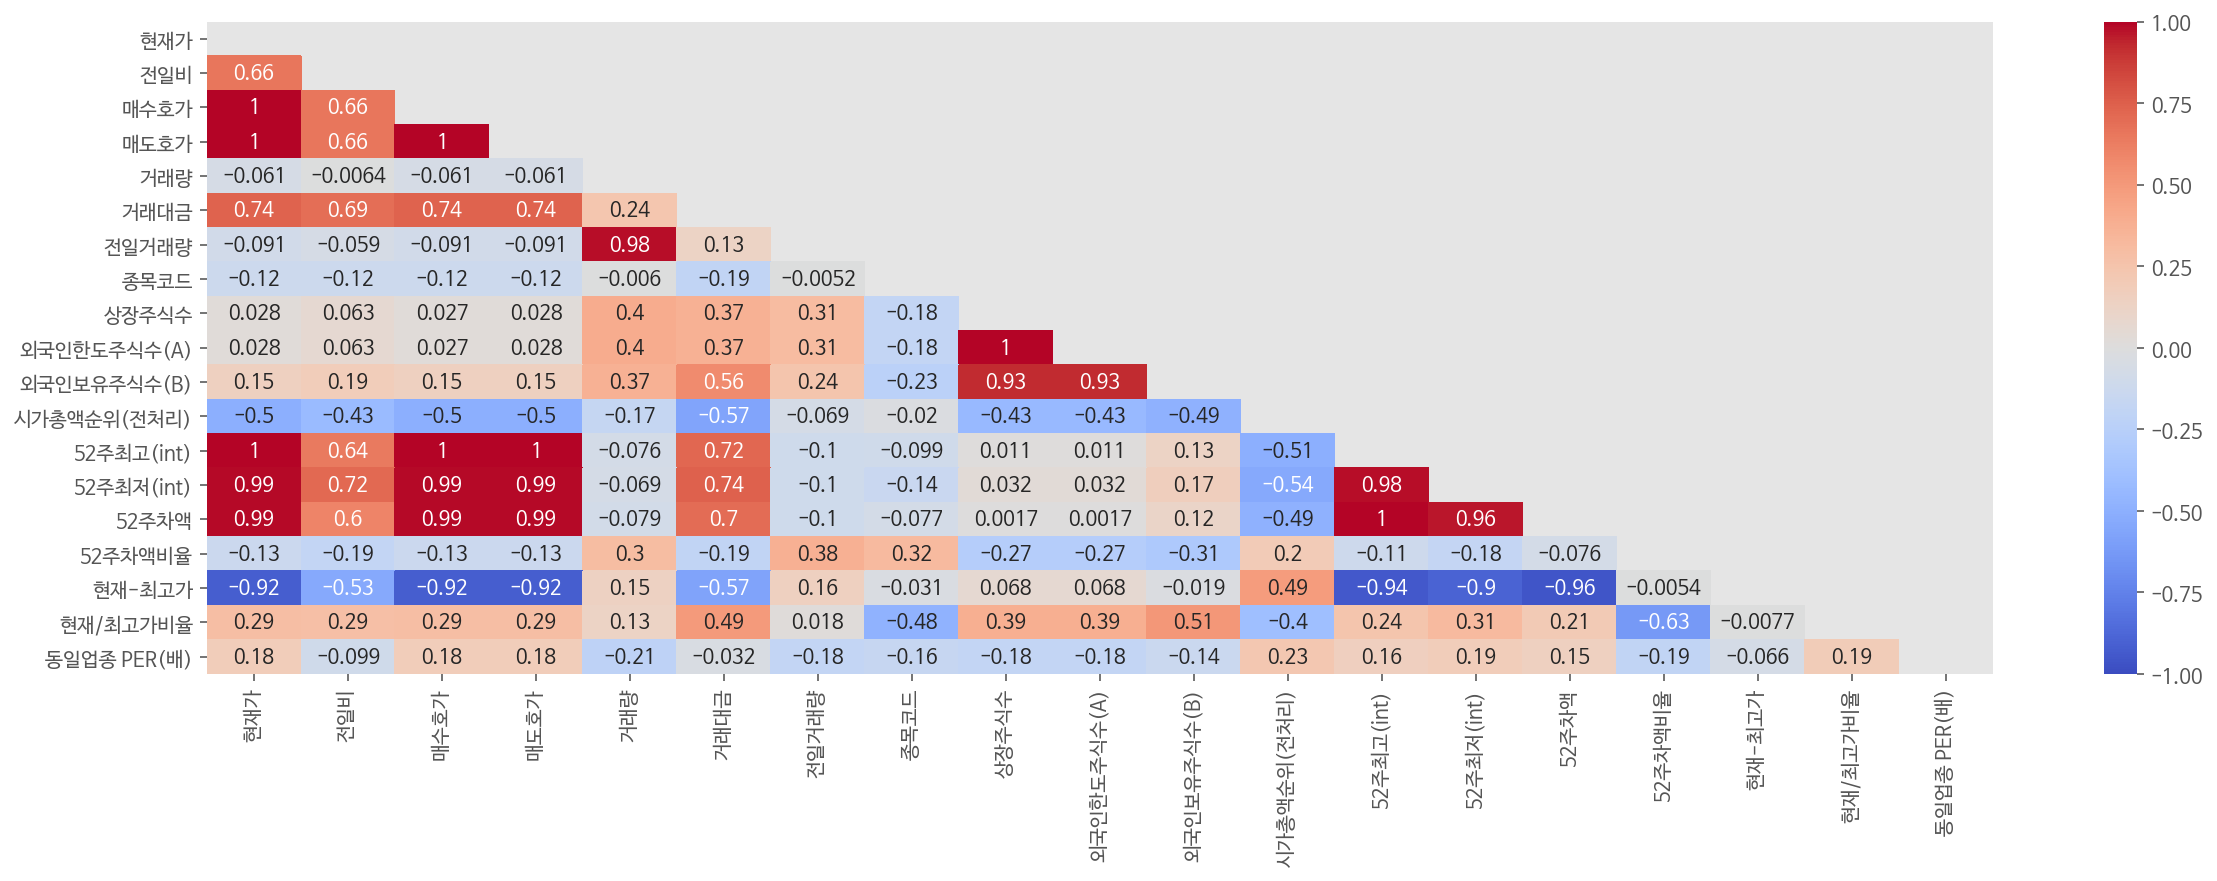

In [ ]:
mask = np.triu(np.ones_like(kospi_corr, dtype=bool))
plt.figure(figsize=(20, 6))
sns.heatmap(kospi_corr, cmap="coolwarm", annot=True, mask=mask, vmax=1, vmin=-1)

### 종목별 상관계수

In [ ]:
코스피.dtypes

종목명                   object
종목명.1                 object
현재가                  float64
전일비                  float64
등락률                   object
매수호가                 float64
매도호가                 float64
거래량                  float64
거래대금                 float64
전일거래량                float64
조회일자                  object
종목코드                   int64
시가총액                  object
시가총액순위                object
상장주식수                  int64
액면가l매매단위              object
외국인한도주식수(A)            int64
외국인보유주식수(B)            int64
외국인소진율(B/A)           object
투자의견l목표주가             object
52주최고l최저              object
PERlEPS(2020.06)      object
추정PERlEPS             object
PBRlBPS (2020.06)     object
배당수익률l2019.12         object
동일업종 PER              object
동일업종 등락률              object
배당수익률                float64
PERlEPS(2019.12)      object
PBRlBPS (2019.12)     object
시가총액(억원)              object
코스피/코스닥               object
시가총액순위(전처리)            int64
액면가                   object
매매단위          

In [ ]:
num_desc = 코스피.set_index("종목명").describe()
num_cols = num_desc.columns.tolist()
num_cols.append("종목명")
num_cols

['현재가',
 '전일비',
 '매수호가',
 '매도호가',
 '거래량',
 '거래대금',
 '전일거래량',
 '종목코드',
 '상장주식수',
 '외국인한도주식수(A)',
 '외국인보유주식수(B)',
 '배당수익률',
 '시가총액순위(전처리)',
 '52주최고(int)',
 '52주최저(int)',
 '52주차액',
 '52주차액비율',
 '현재-최고가',
 '현재/최고가비율',
 '동일업종 PER(배)',
 '종목명']

In [ ]:
num_desc = 코스피.set_index("종목명").describe()
num_cols = num_desc.columns.tolist()
num_cols.append("종목명")

In [ ]:
코스피[num_cols].set_index("종목명").T

종목명,LG화학,현대차,삼성SDI,현대모비스,기아차,SK이노베이션,한온시스템,SKC,만도,LS ELECTRIC,두산솔루스,S&T모티브,삼화콘덴서,한국단자,코스모신소재,KEC,센트랄모텍,인지컨트롤스,지엠비코리아,삼화전기,계양전기,디아이씨,성문전자,삼화전자
현재가,6.510000e+05,1.700000e+05,4.315000e+05,2.380000e+05,5.300000e+04,1.295000e+05,1.175000e+04,7.430000e+04,3.690000e+04,5.080000e+04,3.170000e+04,5.070000e+04,5.140000e+04,4.660000e+04,1.350000e+04,1.955000e+03,1.890000e+04,1.035000e+04,7.400000e+03,1.805000e+04,2.930000e+03,1.415000e+03,1.905000e+03,3.040000e+03
전일비,9.000000e+03,3.500000e+03,1.500000e+03,1.450000e+04,8.000000e+02,2.000000e+03,3.500000e+02,4.000000e+02,5.500000e+02,1.800000e+03,3.000000e+02,1.200000e+03,3.000000e+02,2.000000e+02,5.000000e+01,5.500000e+01,5.000000e+02,3.500000e+02,1.200000e+02,2.500000e+02,6.000000e+01,1.000000e+01,1.000000e+01,3.500000e+01
매수호가,6.510000e+05,1.695000e+05,4.315000e+05,2.380000e+05,5.300000e+04,1.290000e+05,1.175000e+04,7.420000e+04,3.685000e+04,5.080000e+04,3.170000e+04,5.070000e+04,5.140000e+04,4.650000e+04,1.350000e+04,1.955000e+03,1.890000e+04,1.035000e+04,7.390000e+03,1.805000e+04,2.925000e+03,1.395000e+03,1.895000e+03,3.035000e+03
매도호가,6.520000e+05,1.700000e+05,4.320000e+05,2.385000e+05,5.310000e+04,1.295000e+05,1.180000e+04,7.430000e+04,3.690000e+04,5.090000e+04,3.175000e+04,5.090000e+04,5.150000e+04,4.660000e+04,1.355000e+04,1.960000e+03,1.895000e+04,1.040000e+04,7.400000e+03,1.810000e+04,2.930000e+03,1.415000e+03,1.905000e+03,3.040000e+03
거래량,3.615030e+05,1.471138e+06,2.607580e+05,6.907070e+05,3.210725e+06,4.344570e+05,5.998590e+05,2.086000e+05,9.435810e+05,1.683350e+05,1.397430e+05,2.887100e+04,4.303200e+04,3.744900e+04,1.762800e+05,5.919789e+06,2.795300e+04,3.791670e+05,2.115510e+05,2.199600e+04,1.150090e+05,5.609300e+04,7.296700e+04,4.075100e+04
거래대금,2.325040e+05,2.493320e+05,1.108870e+05,1.672820e+05,1.690020e+05,5.551600e+04,7.059000e+03,1.526300e+04,3.437500e+04,8.531000e+03,4.356000e+03,1.473000e+03,2.191000e+03,1.718000e+03,2.336000e+03,1.149200e+04,5.270000e+02,3.884000e+03,1.545000e+03,3.930000e+02,3.340000e+02,7.700000e+01,1.370000e+02,1.220000e+02
전일거래량,3.681050e+05,1.419988e+06,2.577090e+05,4.878580e+05,3.567700e+06,2.432570e+05,5.745760e+05,2.258290e+05,4.875970e+05,9.902000e+04,7.788300e+04,2.685300e+04,3.137900e+04,3.340900e+04,1.999370e+05,9.281798e+06,2.440800e+04,5.333040e+05,5.819940e+05,1.900800e+04,5.492300e+04,7.464200e+04,6.117500e+04,3.409400e+04
종목코드,5.191000e+04,5.380000e+03,6.400000e+03,1.233000e+04,2.700000e+02,9.677000e+04,1.888000e+04,1.179000e+04,2.043200e+05,1.012000e+04,3.363700e+05,6.496000e+04,1.820000e+03,2.554000e+04,5.070000e+03,9.222000e+04,3.081700e+05,2.380000e+04,1.387000e+04,9.470000e+03,1.220000e+04,9.220000e+04,1.491000e+04,1.123000e+04
상장주식수,7.059234e+07,2.136682e+08,6.876453e+07,9.505469e+07,4.053633e+08,9.246556e+07,5.338000e+08,3.753456e+07,4.695712e+07,3.000000e+07,3.058976e+07,1.462314e+07,1.039500e+07,1.041500e+07,2.924796e+07,1.167069e+08,8.610000e+06,1.516013e+07,1.907228e+07,6.613820e+06,3.260000e+07,3.888857e+07,1.948686e+07,1.045794e+07
외국인한도주식수(A),7.059234e+07,2.136682e+08,6.876453e+07,9.505469e+07,4.053633e+08,9.246556e+07,5.338000e+08,3.753456e+07,4.695712e+07,3.000000e+07,3.058976e+07,1.462314e+07,1.039500e+07,1.041500e+07,2.924796e+07,1.167069e+08,8.610000e+06,1.516013e+07,1.907228e+07,6.613820e+06,3.260000e+07,3.888857e+07,1.948686e+07,1.045794e+07


In [ ]:
item_corr = 코스피[num_cols].set_index("종목명").T.corr()
item_corr

종목명,LG화학,현대차,삼성SDI,현대모비스,기아차,SK이노베이션,한온시스템,SKC,만도,LS ELECTRIC,두산솔루스,S&T모티브,삼화콘덴서,한국단자,코스모신소재,KEC,센트랄모텍,인지컨트롤스,지엠비코리아,삼화전기,계양전기,디아이씨,성문전자,삼화전자
종목명,,,,,,,,,,,,,,,,,,,,,,,,
LG화학,1.000000,0.998505,0.999708,0.999467,0.999905,0.994182,0.991673,0.976537,0.991967,0.983704,0.975243,0.994942,0.980415,0.994907,0.965235,0.965249,0.961129,0.970546,0.992696,0.994086,0.968247,0.963756,0.968495,0.975172
현대차,0.998505,1.000000,0.996990,0.996436,0.998613,0.998528,0.997155,0.986656,0.997347,0.991915,0.985678,0.998872,0.989494,0.998852,0.977851,0.977712,0.974441,0.982084,0.985125,0.998465,0.980241,0.976649,0.980441,0.985636
삼성SDI,0.999708,0.996990,1.000000,0.999953,0.999645,0.991379,0.988380,0.971165,0.988744,0.979180,0.969750,0.992304,0.975462,0.992250,0.958782,0.958988,0.954348,0.964613,0.995268,0.991253,0.962067,0.957178,0.962337,0.969669
현대모비스,0.999467,0.996436,0.999953,1.000000,0.999485,0.990416,0.987266,0.969420,0.987707,0.977692,0.967971,0.991373,0.973816,0.991311,0.956720,0.957190,0.952169,0.962791,0.996006,0.990270,0.960078,0.955064,0.960358,0.967889
기아차,0.999905,0.998613,0.999645,0.999485,1.000000,0.994289,0.991807,0.976719,0.992183,0.983858,0.975444,0.995007,0.980513,0.994961,0.965484,0.965897,0.961345,0.970934,0.992787,0.994170,0.968470,0.963987,0.968723,0.975380
SK이노베이션,0.994182,0.998528,0.991379,0.990416,0.994289,1.000000,0.999772,0.994018,0.999759,0.997330,0.993358,0.999965,0.995871,0.999969,0.987735,0.986937,0.985118,0.990669,0.974369,0.999997,0.989511,0.986847,0.989654,0.993330
한온시스템,0.991673,0.997155,0.988380,0.987266,0.991807,0.999772,1.000000,0.996095,0.999888,0.998643,0.995558,0.999586,0.997552,0.999596,0.990808,0.989741,0.988480,0.993224,0.969395,0.999791,0.992343,0.990046,0.992465,0.995544
SKC,0.976537,0.986656,0.971165,0.969420,0.976719,0.994018,0.996095,1.000000,0.995762,0.999339,0.999947,0.993192,0.999811,0.993257,0.998877,0.997315,0.997766,0.999380,0.944122,0.994128,0.999360,0.998587,0.999397,0.999976
만도,0.991967,0.997347,0.988744,0.987707,0.992183,0.999759,0.999888,0.995762,1.000000,0.998413,0.995201,0.999561,0.997237,0.999583,0.990344,0.990014,0.987962,0.993120,0.970242,0.999757,0.991874,0.989508,0.992007,0.995175


In [ ]:
item_corr["LG화학"].sort_values(ascending=False)

종목명
LG화학           1.000000
기아차            0.999905
삼성SDI          0.999708
현대모비스          0.999467
현대차            0.998505
S&T모티브         0.994942
한국단자           0.994907
SK이노베이션        0.994182
삼화전기           0.994086
지엠비코리아         0.992696
만도             0.991967
한온시스템          0.991673
LS ELECTRIC    0.983704
삼화콘덴서          0.980415
SKC            0.976537
두산솔루스          0.975243
삼화전자           0.975172
인지컨트롤스         0.970546
성문전자           0.968495
계양전기           0.968247
KEC            0.965249
코스모신소재         0.965235
디아이씨           0.963756
센트랄모텍          0.961129
Name: LG화학, dtype: float64

* 실습결과에 다른 테마를 적용해 보면 같은 방식으로 여러 테마를 분석해 보실 수 있습니다.

In [72]:
item_corr.loc[(item_corr["LG화학"] > 0.95) & (item_corr["LG화학"] < 0.97), "LG화학"]

종목명
코스모신소재    0.965235
KEC       0.965249
센트랄모텍     0.961129
계양전기      0.968247
디아이씨      0.963756
성문전자      0.968495
Name: LG화학, dtype: float64